In [2]:
import pandas as pd
import numpy as np

In [3]:
april_df = pd.read_csv("april.csv")
may_df = pd.read_csv("may.csv")
average_df = pd.read_csv("average.csv")

In [5]:
average_df

,Publisher,Installs,LTV
0,1aa97,297.5,0.51
1,79396,458.0,0.91
2,674b3,301.5,2.70
3,cc322,479.5,3.02
4,636df,190.5,3.42
5,59c47,240.0,5.15
6,9b91e,189.5,5.61
7,9f642,124.5,6.42
8,afb54,168.5,7.50
9,ce762,457.5,7.81


In [5]:
#april_df["LTV"] = april_df["LTV"].apply(lambda x: x.replace("$", ""))
#april_df

In [6]:
average_df["LTV"] = average_df["LTV"].apply(float)
average_df["K"] = average_df["Installs"] / 4 #4 is our CPI
average_df

,Publisher,Installs,LTV,K
0,1aa97,297.5,0.51,74.375
1,79396,458.0,0.91,114.500
2,674b3,301.5,2.70,75.375
3,cc322,479.5,3.02,119.875
4,636df,190.5,3.42,47.625
5,59c47,240.0,5.15,60.000
6,9b91e,189.5,5.61,47.375
7,9f642,124.5,6.42,31.125
8,afb54,168.5,7.50,42.125
9,ce762,457.5,7.81,114.375


<AxesSubplot:xlabel='Publisher', ylabel='LTV'>

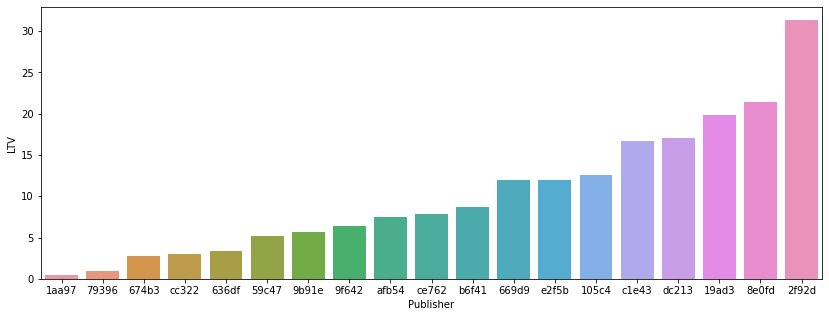

In [7]:

import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(14, 5))
sns.barplot(data = average_df.sort_values('LTV'), x = 'Publisher', y = 'LTV')

In [ ]:
# from sklearn.cluster import KMeans

# kmeans = KMeans(n_clusters = 3, random_state = 0, n_init='auto')
# model = kmeans.fit(april_df[["LTV"]])

# labels = model.fit_predict(april_df[["LTV"]])
# df_with_labels = april_df
# df_with_labels["label"] = labels

# df_with_labels

In [ ]:
# #Getting unique labels

# u_labels = np.unique(label)

# ddf = df_with_labels[["LTV", "label"]]
# ddf["day"] = 1
# sns.catplot(data=ddf, kind="swarm", x="day", y="LTV", hue="label")



# # for i in u_labels:
# #     df_i = df_with_labels[df_with_labels["label"] == i][["Publisher", "LTV", "label"]]
# #     plt.scatter(df_with_labels[label == i , 0] , df_with_labels[label == i , 1] , label = i)
# # plt.legend()
# # plt.show()

In [8]:
!pip install k-means-constrained

Defaulting to user installation because normal site-packages is not writeable

[notice] A new release of pip is available: 23.0.1 -> 23.1.2
[notice] To update, run: python3 -m pip install --upgrade pip


In [9]:
from k_means_constrained import KMeansConstrained

def clusterize(df, num_clusters):

  clf = KMeansConstrained(
      n_clusters=num_clusters,
      size_min=5,
      random_state=0
  )
  df_with_labels = df

  model = clf.fit(df[["LTV"]])

  # labels = clf.fit_predict(april_df[["LTV"]])
  df_with_labels["label"] = clf.fit_predict(average_df[["LTV"]])

  ddf = df_with_labels[["LTV", "label"]]
  ddf["day"] = 1
  sns.catplot(data=ddf, kind="swarm", x="day", y="LTV", hue="label")


  return df_with_labels

/tmp/ipykernel_237927/219493551.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ddf["day"] = 1


,Publisher,Installs,LTV,K,label
0,1aa97,297.5,0.51,74.375,0
1,79396,458.0,0.91,114.500,0
2,674b3,301.5,2.70,75.375,0
3,cc322,479.5,3.02,119.875,0
4,636df,190.5,3.42,47.625,0
5,59c47,240.0,5.15,60.000,0
6,9b91e,189.5,5.61,47.375,0
7,9f642,124.5,6.42,31.125,0
8,afb54,168.5,7.50,42.125,0
9,ce762,457.5,7.81,114.375,0


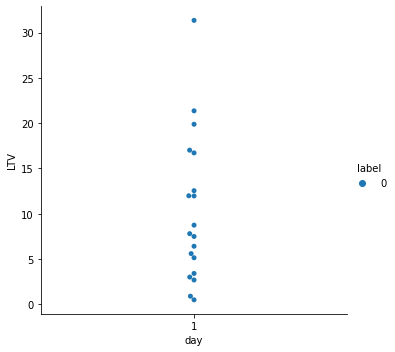

In [10]:
clusterize(average_df, 1)

/tmp/ipykernel_237927/219493551.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ddf["day"] = 1


,Publisher,Installs,LTV,K,label
0,1aa97,297.5,0.51,74.375,0
1,79396,458.0,0.91,114.500,0
2,674b3,301.5,2.70,75.375,0
3,cc322,479.5,3.02,119.875,0
4,636df,190.5,3.42,47.625,0
5,59c47,240.0,5.15,60.000,0
6,9b91e,189.5,5.61,47.375,0
7,9f642,124.5,6.42,31.125,0
8,afb54,168.5,7.50,42.125,0
9,ce762,457.5,7.81,114.375,0


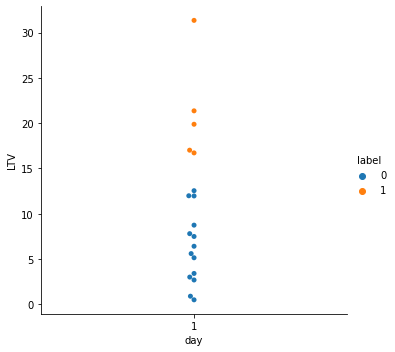

In [11]:
clusterize(average_df, 2)

/tmp/ipykernel_237927/219493551.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ddf["day"] = 1


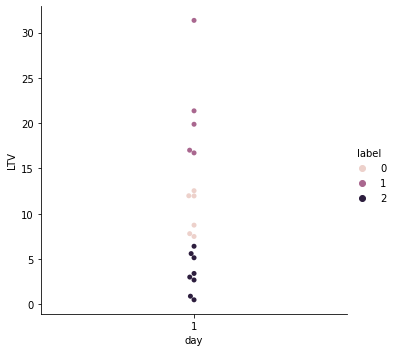

In [12]:
df = clusterize(average_df, 3)

In [13]:
import scipy.optimize as opt
from scipy.optimize import minimize

from scipy.optimize import Bounds
from scipy.optimize import minimize_scalar


In [14]:

df_i = df[df["label"] == 0]
df_i.head()

,Publisher,Installs,LTV,K,label
8,afb54,168.5,7.50,42.125,0
9,ce762,457.5,7.81,114.375,0
10,b6f41,179.5,8.75,44.875,0
11,669d9,263.5,11.97,65.875,0
12,e2f5b,241.5,11.99,60.375,0


In [15]:



def optimize(x, df_i):
  sum = 0
  for index, row in df_i.iterrows():
    sum = sum + row["K"] * x * (row["LTV"] - x)
  return sum

def get_cpi_for_clusters(df, num_clusters):
  cpi = []
  for l in range(num_clusters):
    df_i = df[df["label"] == l]
    f_label = lambda x: optimize(x, df_i) * -1
    res = minimize_scalar(f_label, method='bounded', bounds=(1, 1000))
    print("Profit", optimize(res.x, df_i), "CPI =", res.x)

    cpi.append((res.x, optimize(res.x, df_i)))
  return cpi

In [16]:
def get_profit(n_clusters):
  df_with_clusters = clusterize(average_df, n_clusters)

  cpis = get_cpi_for_clusters(df_with_clusters, n_clusters)
  total_profit = 0
  for i in range(n_clusters):
    total_profit = total_profit + cpis[i][1]
  print("Total profit:", total_profit)

Profit 31654.565393601464 CPI = 4.76547574208592
Total profit: 31654.565393601464


/tmp/ipykernel_237927/219493551.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ddf["day"] = 1


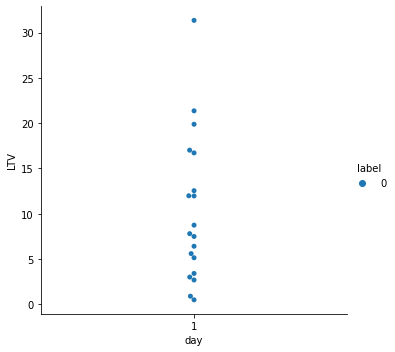

In [17]:
get_profit(1)

Profit 10927.896985586209 CPI = 3.208735131315513
Profit 31509.51789485432 CPI = 9.73475563909771
Total profit: 42437.41488044053


/tmp/ipykernel_237927/219493551.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ddf["day"] = 1


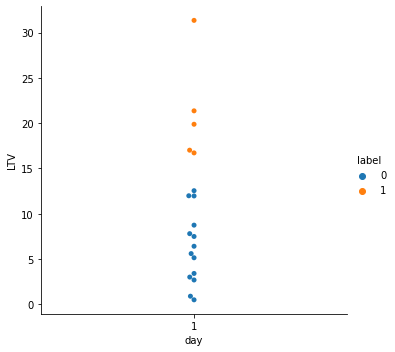

In [18]:
get_profit(2)

Profit 13586.001493029398 CPI = 5.259564774751862
Profit 31509.51789485432 CPI = 9.73475563909771
Profit 1186.5274740135906 CPI = 1.442468215694873
Total profit: 46282.04686189731


/tmp/ipykernel_237927/219493551.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ddf["day"] = 1


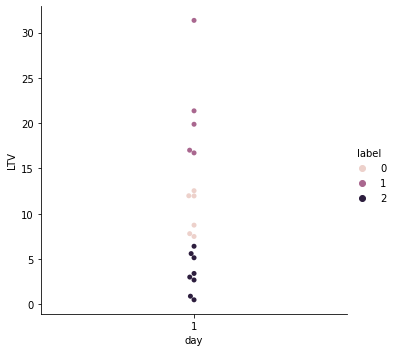

In [19]:
get_profit(3)

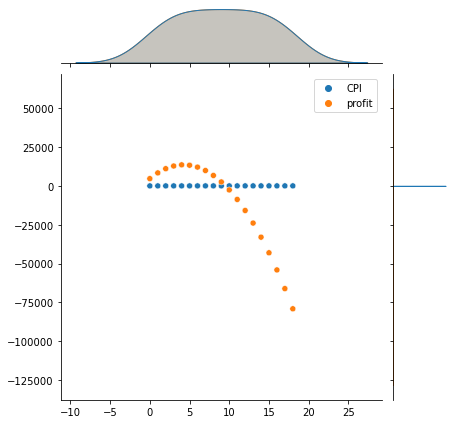

In [20]:
cpi_df = pd.DataFrame({ 'CPI' : range(1, 20),
    'profit' : [optimize(i, df_i) for i in range(1, 20)]})

sns.jointplot(data=cpi_df)